## Mosaico

In [ ]:
from PIL import Image
import os
import math

# Directorios de las imágenes
dataset_dir = "../../../2.DATASETS/SiBurmuin_50_images_dataset/backgrounds"
#dataset_dir = "../../../2.DATASETS/SiBurmuin_50_images_dataset/processed"
#dataset_dir = "../../../2.DATASETS/SiBurmuin_50_images_dataset/raw"
folders = ['animals', 'objects']

# Parámetros del mosaico
tile_size = (100, 100)  # Tamaño de cada imagen en el mosaico (ajustable)
padding = 10  # Espacio entre imágenes
background_color = (255, 255, 255)  # Color de fondo blanco

def add_white_background(img):
    """Si la imagen tiene canal alfa (transparencia), reemplaza el fondo con blanco."""
    if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
        # Crear una imagen blanca del mismo tamaño
        background = Image.new('RGB', img.size, background_color)
        # Combinar la imagen con transparencia sobre el fondo blanco
        background.paste(img, mask=img.split()[3])  # Usar el canal alfa como máscara
        return background
    else:
        return img.convert('RGB')  # Convertir a RGB si no tiene canal alfa

def create_mosaic(folder_path, output_path):
    # Obtener las rutas de todas las imágenes en la carpeta
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('png', 'jpg', 'jpeg'))]
    
    # Calcular el tamaño del mosaico (asumimos que serán 5x5 imágenes)
    grid_size = math.ceil(math.sqrt(len(image_files)))
    mosaic_width = grid_size * tile_size[0] + (grid_size + 1) * padding
    mosaic_height = grid_size * tile_size[1] + (grid_size + 1) * padding
    
    # Crear la imagen del mosaico con fondo blanco
    mosaic_image = Image.new('RGB', (mosaic_width, mosaic_height), background_color)
    
    # Pegar cada imagen en el mosaico
    for idx, image_file in enumerate(image_files):
        row = idx // grid_size
        col = idx % grid_size
        img = Image.open(image_file)
        img = add_white_background(img)  # Añadir fondo blanco si la imagen tiene transparencia
        img = img.resize(tile_size)
        
        x_offset = col * tile_size[0] + (col + 1) * padding
        y_offset = row * tile_size[1] + (row + 1) * padding
        mosaic_image.paste(img, (x_offset, y_offset))
    
    # Guardar el mosaico
    mosaic_image.save(output_path)

# Crear los mosaicos para ambas carpetas
for folder in folders:
    folder_path = os.path.join(dataset_dir, folder)
    output_image = f"{folder}_mosaic.jpg"
    create_mosaic(folder_path, output_image)
    print(f"Mosaico guardado en: {output_image}")


In [39]:
from PIL import Image
import os
import math

# Directorio de las imágenes
dataset_dir = "../../../2.DATASETS/SiBurmuin_50_images_dataset/processed/animals_frequencies"

# Parámetros del mosaico
tile_size = (100, 100)  # Tamaño de cada imagen en el mosaico (ajustable)
padding = 10  # Espacio entre imágenes
background_color = (255, 255, 255)  # Color de fondo blanco

def add_white_background(img):
    """Si la imagen tiene canal alfa (transparencia), reemplaza el fondo con blanco."""
    if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
        # Crear una imagen blanca del mismo tamaño
        background = Image.new('RGB', img.size, background_color)
        # Combinar la imagen con transparencia sobre el fondo blanco
        background.paste(img, mask=img.split()[3])  # Usar el canal alfa como máscara
        return background
    else:
        return img.convert('RGB')  # Convertir a RGB si no tiene canal alfa

def create_mosaic(folder_path):
    # Obtener las rutas de todas las imágenes en la carpeta
    image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('png', 'jpg', 'jpeg'))]
    
    if not image_files:  # Si no hay imágenes, salir
        return
    
    # Calcular el tamaño del mosaico
    grid_size = math.ceil(math.sqrt(len(image_files)))
    mosaic_width = grid_size * tile_size[0] + (grid_size + 1) * padding
    mosaic_height = grid_size * tile_size[1] + (grid_size + 1) * padding
    
    # Crear la imagen del mosaico con fondo blanco
    mosaic_image = Image.new('RGB', (mosaic_width, mosaic_height), background_color)
    
    # Pegar cada imagen en el mosaico
    for idx, image_file in enumerate(image_files):
        row = idx // grid_size
        col = idx % grid_size
        img = Image.open(image_file)
        img = add_white_background(img)  # Añadir fondo blanco si la imagen tiene transparencia
        img = img.resize(tile_size)
        
        x_offset = col * tile_size[0] + (col + 1) * padding
        y_offset = row * tile_size[1] + (row + 1) * padding
        mosaic_image.paste(img, (x_offset, y_offset))
    
    # Guardar el mosaico en la misma carpeta
    output_path = os.path.join(folder_path, f"{os.path.basename(folder_path)}_mosaic.jpg")
    mosaic_image.save(output_path)
    print(f"Mosaico guardado en: {output_path}")

# Explorar todas las carpetas internas
for root, dirs, files in os.walk(dataset_dir):
    for dir_name in dirs:
        folder_path = os.path.join(root, dir_name)
        create_mosaic(folder_path)


Mosaico guardado en: ../../../2.DATASETS/SiBurmuin_50_images_dataset/processed/animals_frequencies\animals_sf_10\alpha_high\alpha_high_mosaic.jpg
Mosaico guardado en: ../../../2.DATASETS/SiBurmuin_50_images_dataset/processed/animals_frequencies\animals_sf_10\alpha_low\alpha_low_mosaic.jpg
Mosaico guardado en: ../../../2.DATASETS/SiBurmuin_50_images_dataset/processed/animals_frequencies\animals_sf_10\high\high_mosaic.jpg
Mosaico guardado en: ../../../2.DATASETS/SiBurmuin_50_images_dataset/processed/animals_frequencies\animals_sf_10\low\low_mosaic.jpg
Mosaico guardado en: ../../../2.DATASETS/SiBurmuin_50_images_dataset/processed/animals_frequencies\animals_sf_15\alpha_high\alpha_high_mosaic.jpg
Mosaico guardado en: ../../../2.DATASETS/SiBurmuin_50_images_dataset/processed/animals_frequencies\animals_sf_15\alpha_low\alpha_low_mosaic.jpg
Mosaico guardado en: ../../../2.DATASETS/SiBurmuin_50_images_dataset/processed/animals_frequencies\animals_sf_15\high\high_mosaic.jpg
Mosaico guardado en:

## Remove Backgorund

In [4]:
from backgroundremover.bg import remove

def remove_bg(src_img_path, out_img_path):
    model_choices = ["u2net", "u2net_human_seg", "u2netp"]
    f = open(src_img_path, "rb")
    data = f.read()
    img = remove(data, model_name=model_choices[0],
                 alpha_matting=True,
                 alpha_matting_foreground_threshold=240,
                 alpha_matting_background_threshold=10,
                 alpha_matting_erode_structure_size=10,
                 alpha_matting_base_size=1000)
    f.close()
    f = open(out_img_path, "wb")
    f.write(img)
    f.close()

remove_bg(r"C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\raw\animals\M_N815026.jpg", r"C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\raw\animals\outputttt.jpg")

DEBUG: path to be checked: C:\Users\akoun\.u2net\u2net.pth


In [ ]:
import os
from backgroundremover.bg import remove

def remove_bg(src_img_path, out_img_path):
    model_choices = ["u2net", "u2net_human_seg", "u2netp"]
    with open(src_img_path, "rb") as f:
        data = f.read()
        img = remove(data, model_name=model_choices[0],
                     alpha_matting=True,
                     alpha_matting_foreground_threshold=240,
                     alpha_matting_background_threshold=10,
                     alpha_matting_erode_structure_size=10,
                     alpha_matting_base_size=1000)
    
    with open(out_img_path, "wb") as f:
        f.write(img)

def process_directory(raw_dir, processed_dir):
    # Recorrer la carpeta raw de manera recursiva
    for root, dirs, files in os.walk(raw_dir):
        # Crear las carpetas en processed manteniendo la estructura
        relative_path = os.path.relpath(root, raw_dir)
        target_dir = os.path.join(processed_dir, relative_path)
        os.makedirs(target_dir, exist_ok=True)

        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Filtrar solo imágenes
                src_img_path = os.path.join(root, file)
                out_img_path = os.path.join(target_dir, file)
                
                print(f"Procesando: {src_img_path} -> {out_img_path}")
                try:
                    remove_bg(src_img_path, out_img_path)
                except Exception as e:
                    print(f"Error al procesar {src_img_path}: {e}")

# Rutas de las carpetas raw y processed
raw_dir = r"C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\raw"
processed_dir = r"C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\processed"

# Procesar todo el contenido
process_directory(raw_dir, processed_dir)


## Remove & Save Background

In [17]:
import os
from backgroundremover.bg import remove
from PIL import Image, ImageChops
import numpy as np

def save_background(src_img_path, img_data, output_dir, relative_path):
    # Crear la ruta de salida para el fondo manteniendo la estructura de carpetas
    target_bg_dir = os.path.join(output_dir, relative_path)
    os.makedirs(target_bg_dir, exist_ok=True)  # Asegurar que la carpeta exista
    
    # Nombre del archivo PNG para el fondo
    filename = os.path.basename(src_img_path)
    filename = os.path.splitext(filename)[0] + ".png"  # Asegurar formato PNG
    bg_img_path = os.path.join(target_bg_dir, f"background_{filename}")
    
    # Cargar la imagen original
    original = Image.open(src_img_path).convert("RGBA")
    
    # Cargar la imagen con el fondo removido
    img_removed = Image.open(img_data).convert("RGBA")
    
    # Crear la imagen del fondo restando la imagen sin fondo de la original
    background = ImageChops.subtract(original, img_removed)
    
    # Guardar el fondo en PNG
    background.save(bg_img_path, "PNG")
    print(f"Fondo guardado: {bg_img_path}")

def remove_bg(src_img_path, out_img_path, output_dir, relative_path):
    model_choices = ["u2net", "u2net_human_seg", "u2netp"]
    with open(src_img_path, "rb") as f:
        data = f.read()
        img = remove(data, model_name=model_choices[0],
                     alpha_matting=True,
                     alpha_matting_foreground_threshold=240,
                     alpha_matting_background_threshold=10,
                     alpha_matting_erode_structure_size=10,
                     alpha_matting_base_size=1000)
    
    # Cambiar la extensión a PNG para imágenes sin fondo
    out_img_path = os.path.splitext(out_img_path)[0] + ".png"
    
    # Guardar imagen sin fondo en formato PNG
    with open(out_img_path, "wb") as f:
        f.write(img)

    # Guardar fondo eliminado
    save_background(src_img_path, out_img_path, output_dir, relative_path)

def process_directory(raw_dir, processed_dir, output_dir):
    # Recorrer la carpeta raw de manera recursiva
    for root, dirs, files in os.walk(raw_dir):
        # Crear las carpetas en processed manteniendo la estructura
        relative_path = os.path.relpath(root, raw_dir)
        target_dir = os.path.join(processed_dir, relative_path)
        os.makedirs(target_dir, exist_ok=True)

        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Filtrar solo imágenes
                src_img_path = os.path.join(root, file)
                out_img_path = os.path.join(target_dir, file)
                
                print(f"Procesando: {src_img_path} -> {out_img_path}")
                try:
                    remove_bg(src_img_path, out_img_path, output_dir, relative_path)
                except Exception as e:
                    print(f"Error al procesar {src_img_path}: {e}")

# Rutas de las carpetas raw, processed y backgrounds
raw_dir = r"C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\raw"
processed_dir = r"C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\processed"
output_dir = r"C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\backgrounds"

# Procesar todo el contenido
process_directory(raw_dir, processed_dir, output_dir)


Procesando: C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\raw\animals\B_N209044.jpg -> C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\processed\animals\B_N209044.jpg
DEBUG: path to be checked: C:\Users\akoun\.u2net\u2net.pth
Fondo guardado: C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\backgrounds\animals\background_B_N209044.png
Procesando: C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\raw\animals\B_N253041.jpg -> C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\processed\animals\B_N253041.jpg
DEBUG: path to be checked: C:\Users\akoun\.u2net\u2net.pth
Fondo guardado: C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\backgrounds\animals\background_B_N253041.png
Procesando: C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\raw\animals\B_N253081.jpg -> C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_datas

## Spatial Frecuency modifications

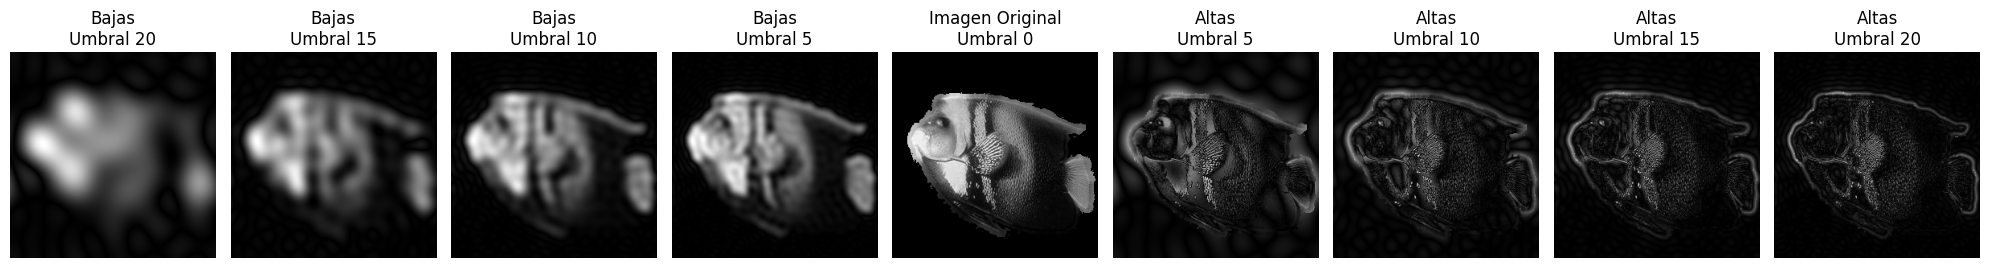

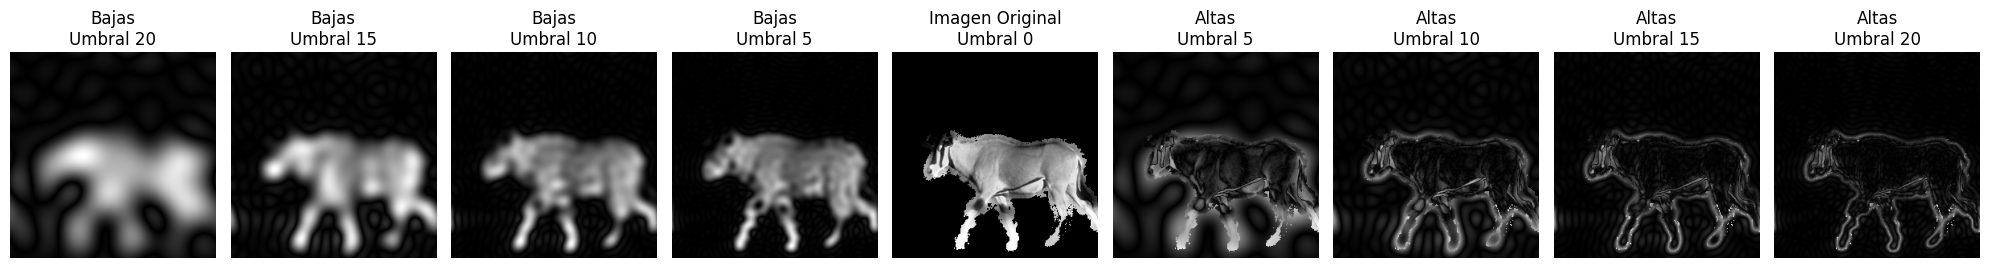

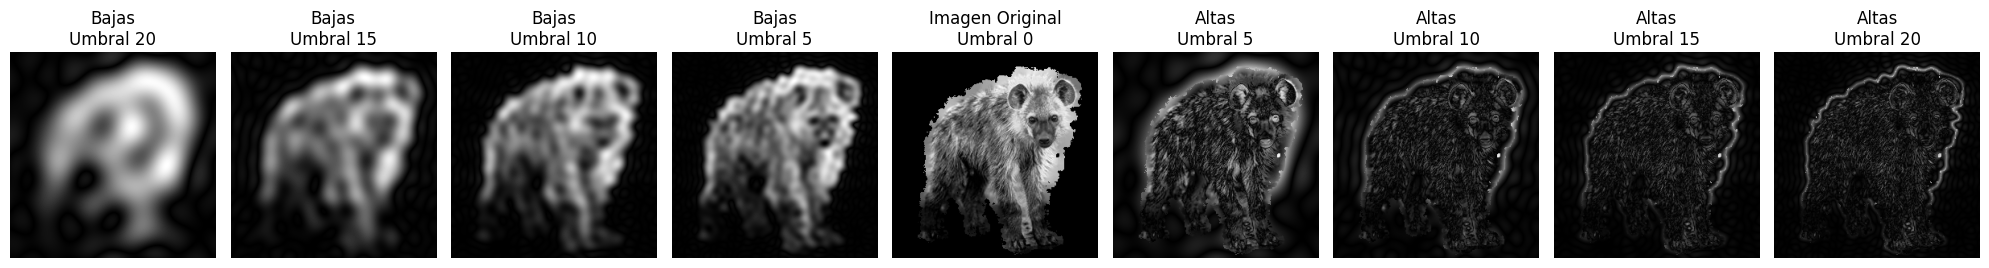

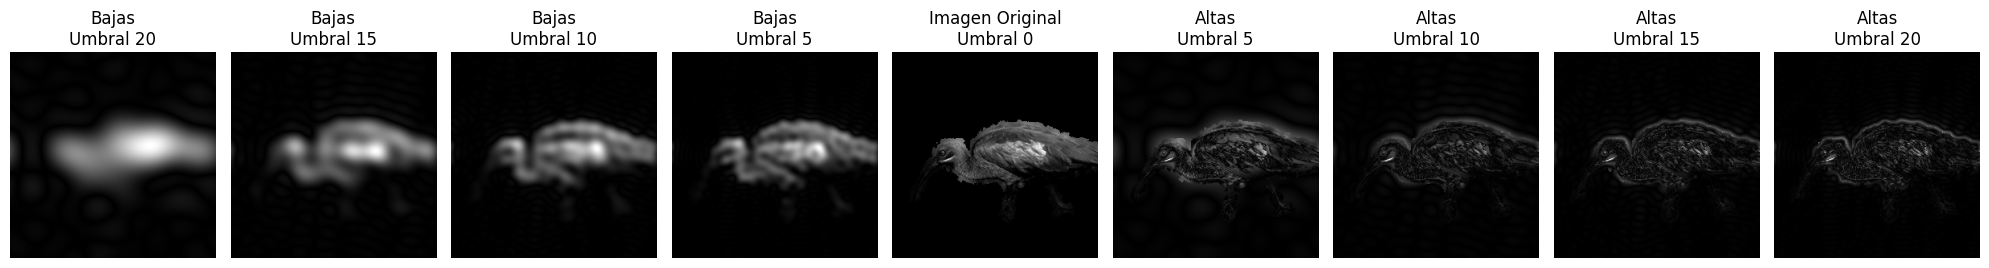

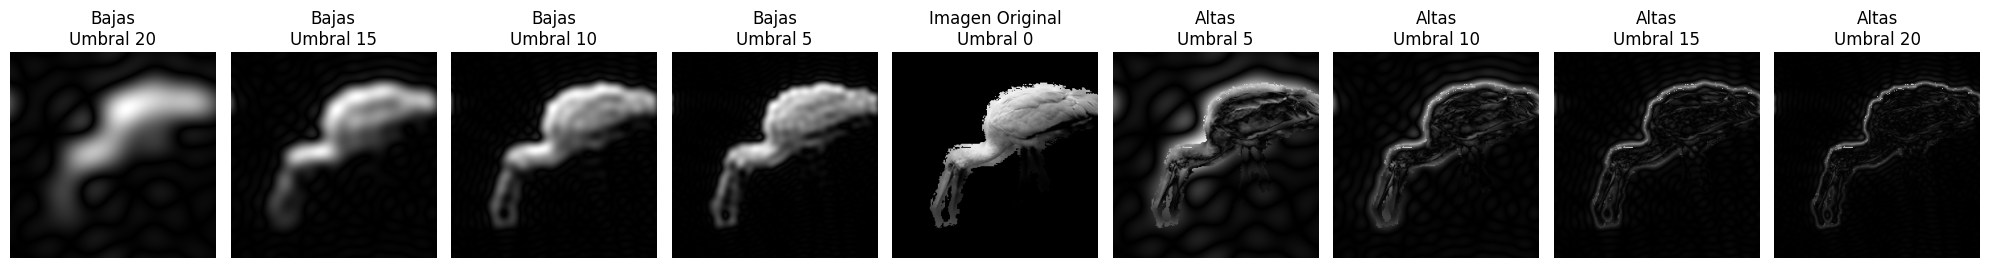

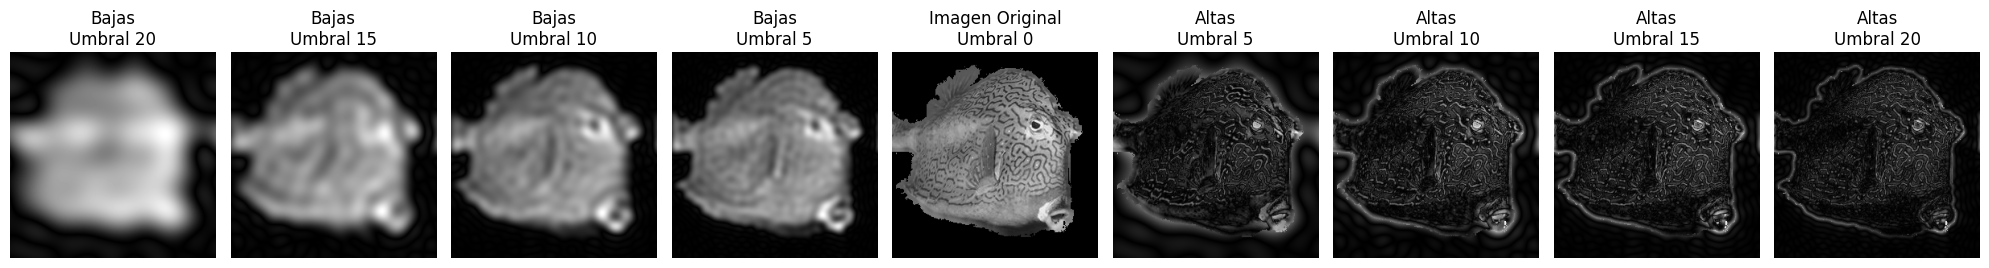

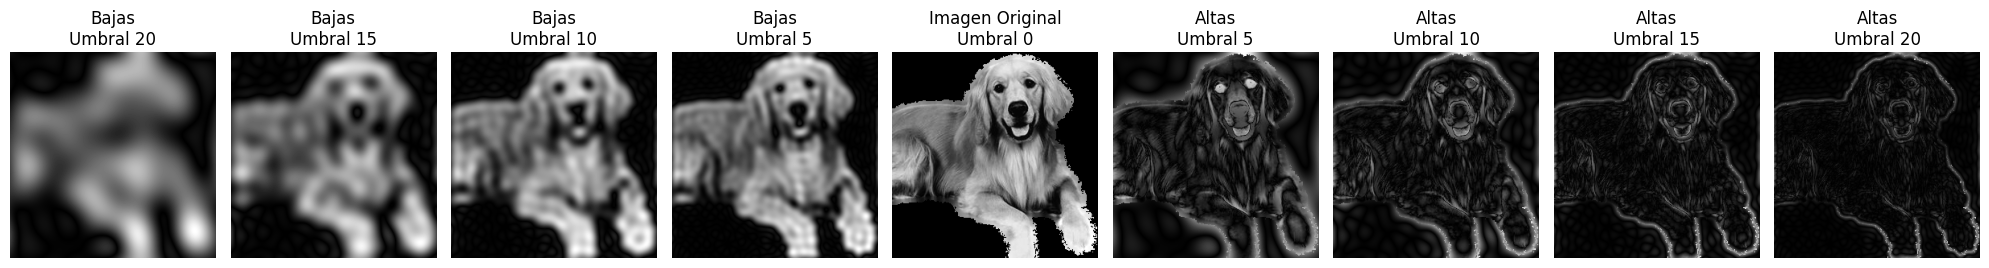

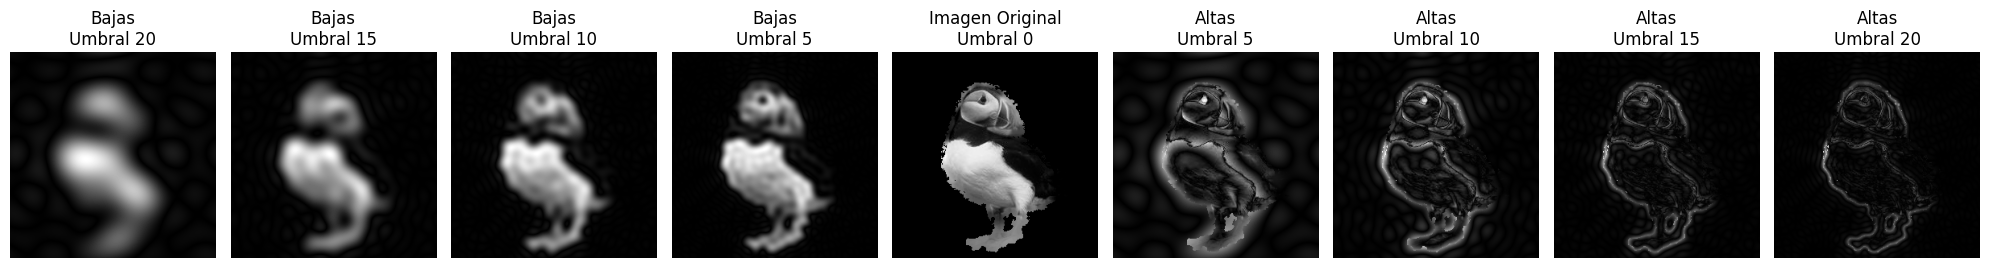

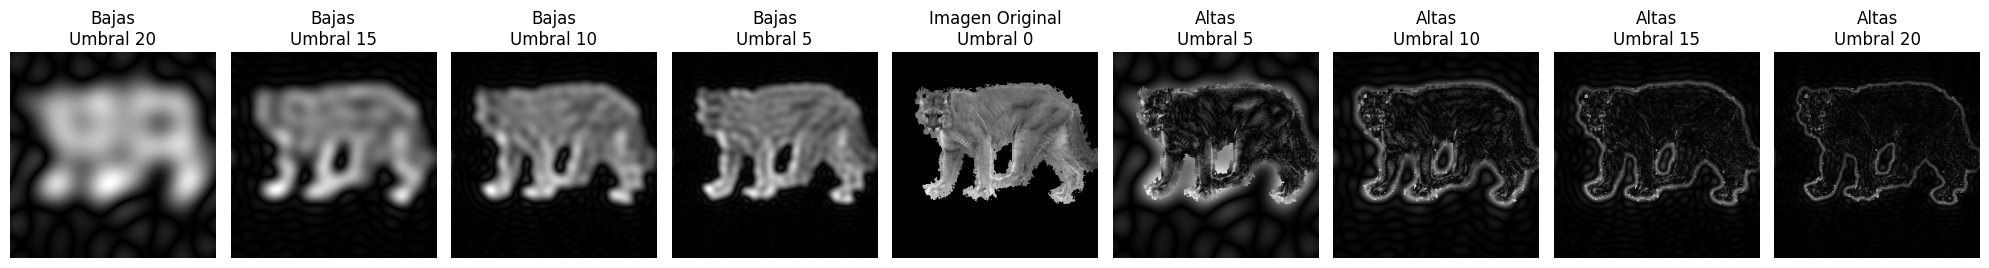

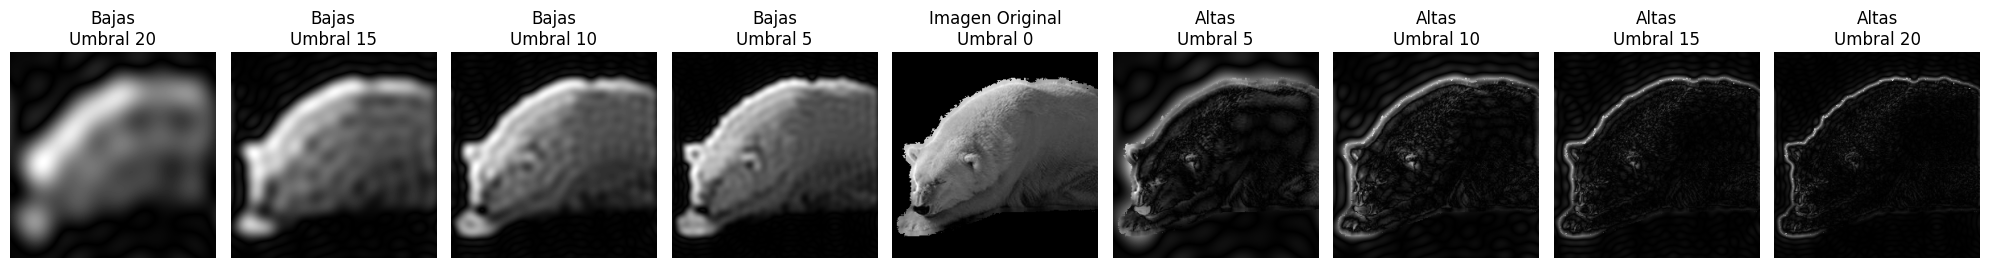

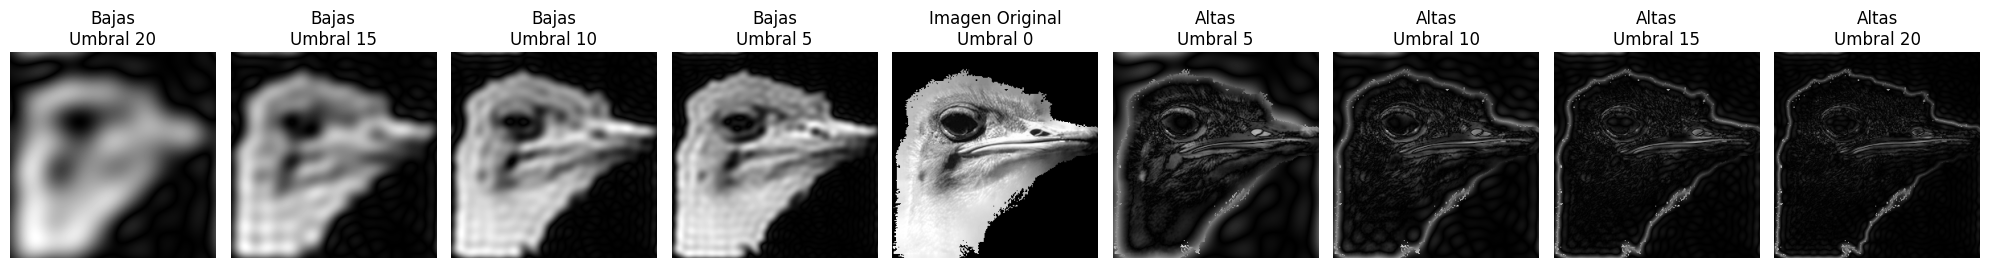

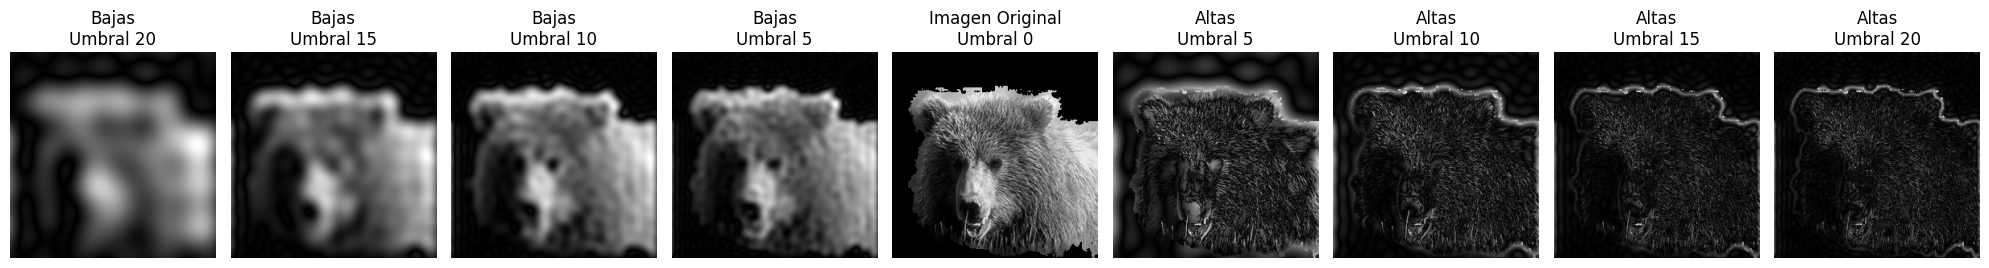

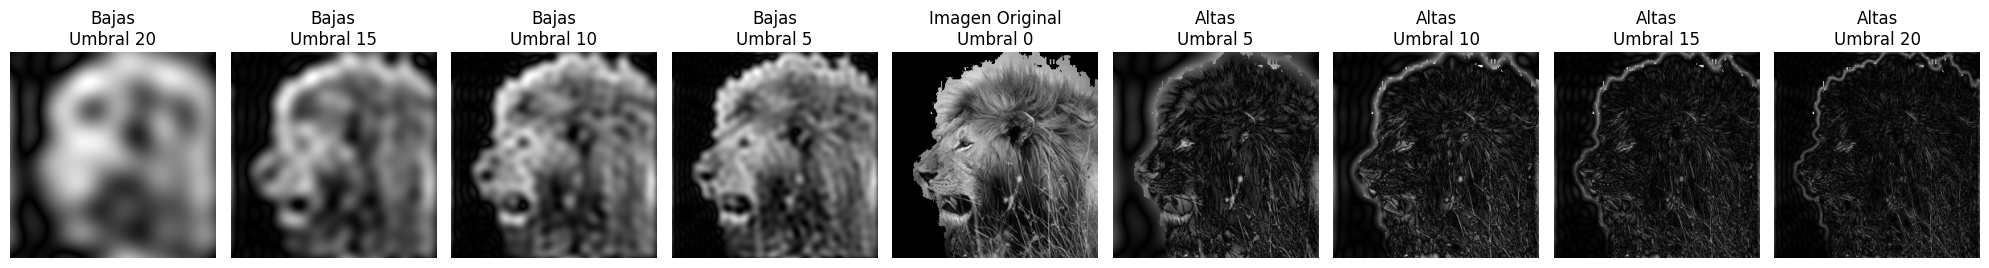

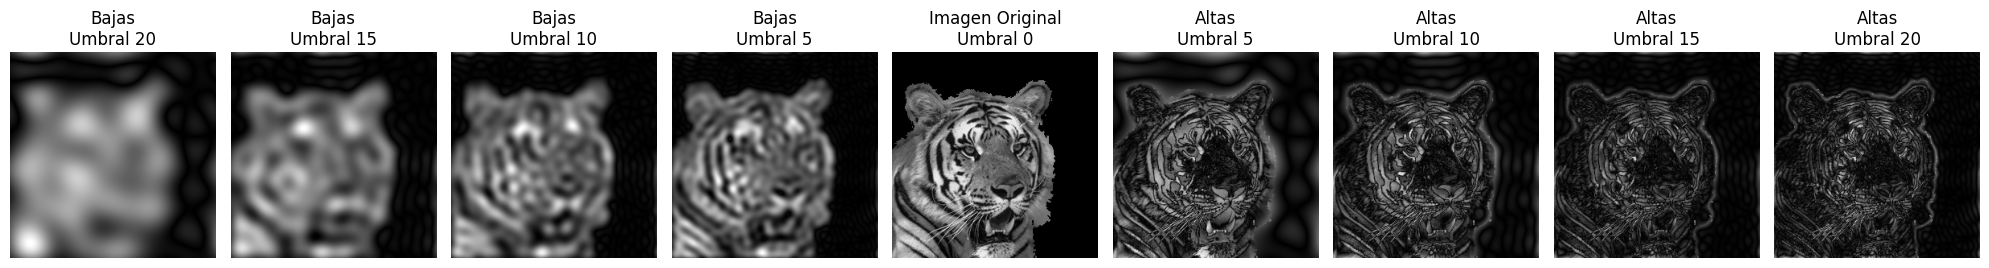

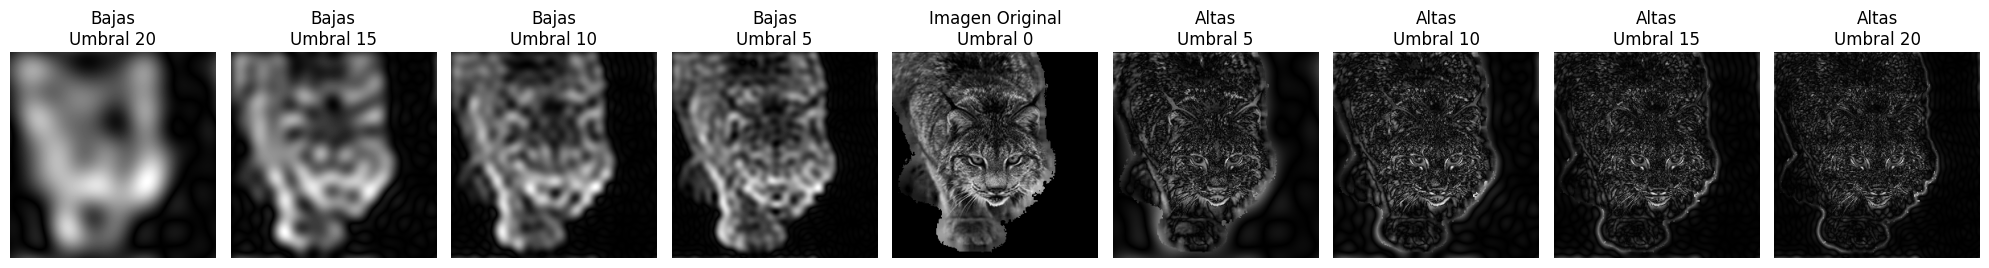

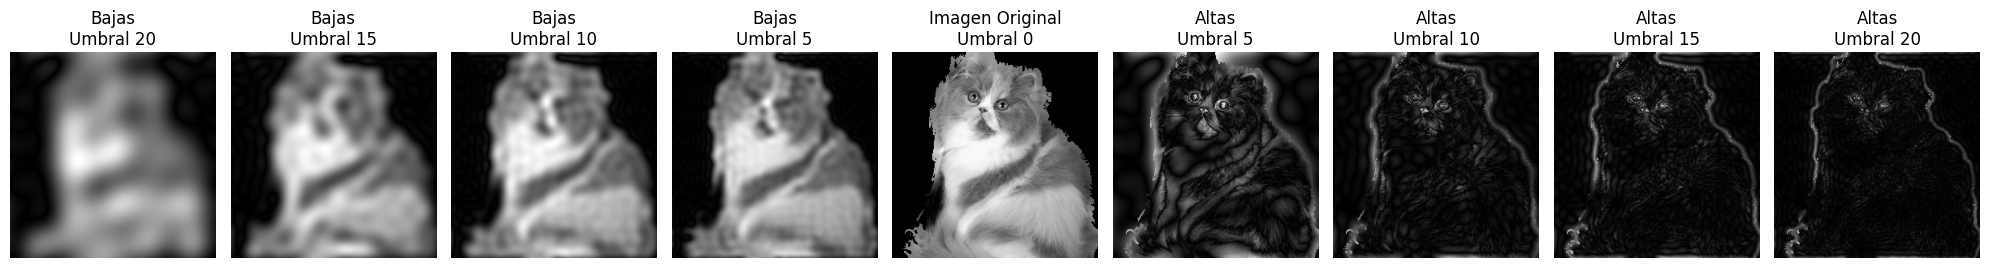

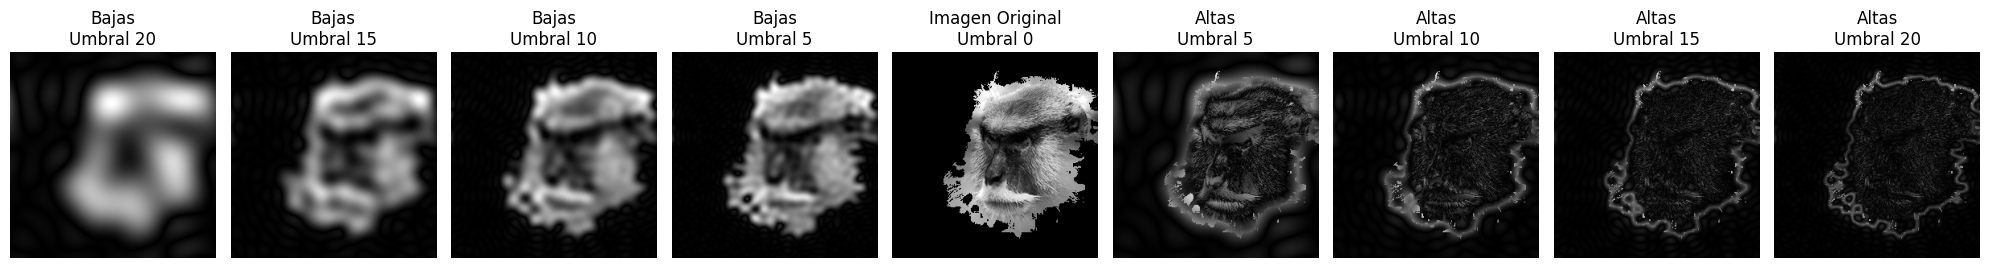

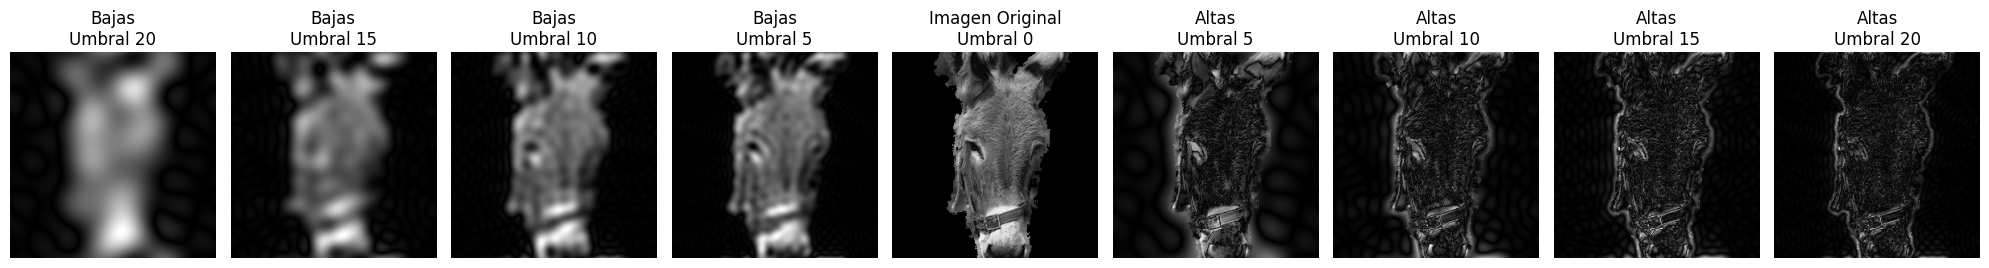

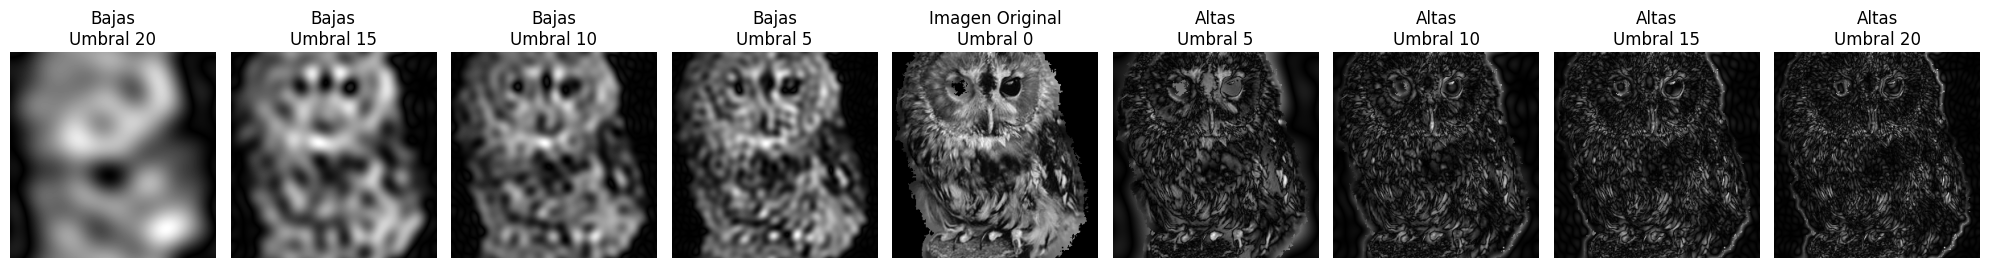

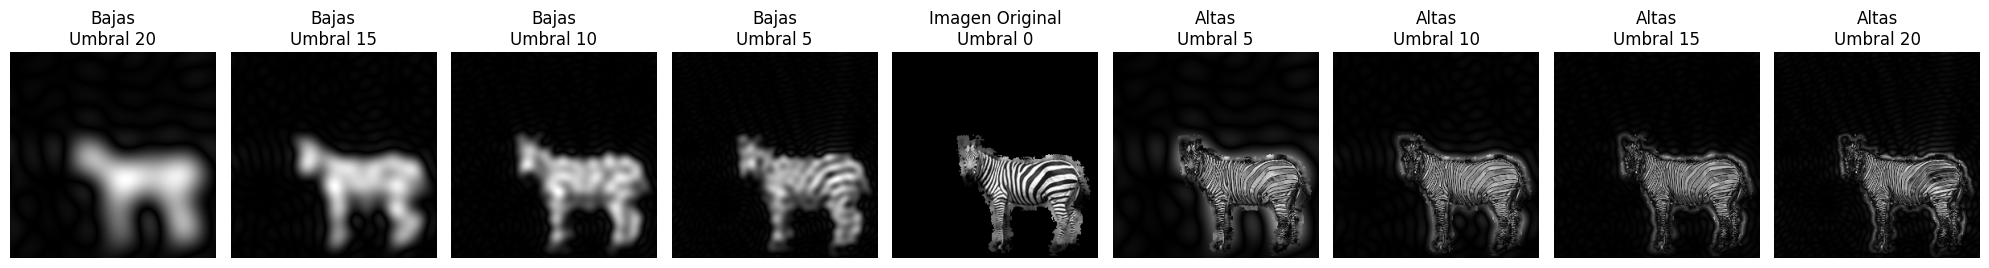

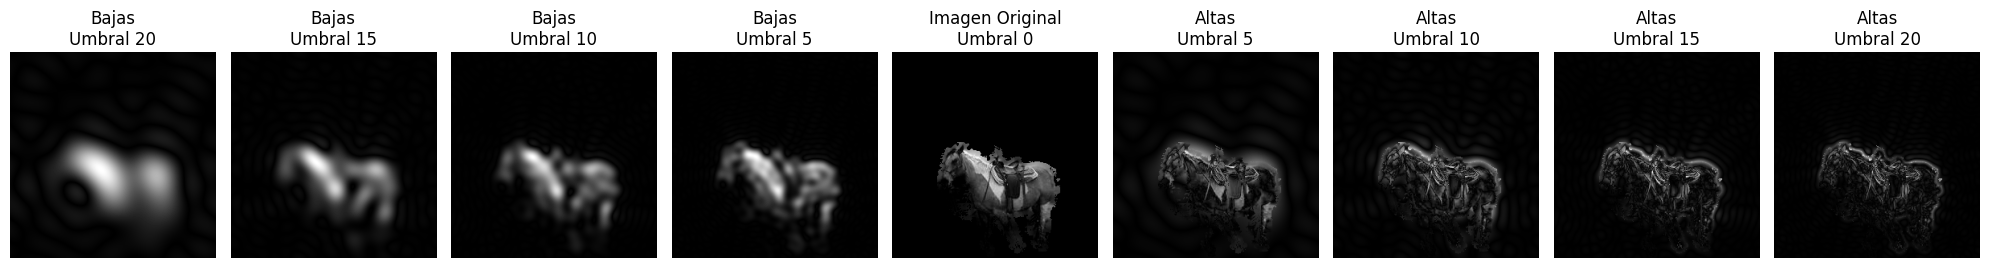

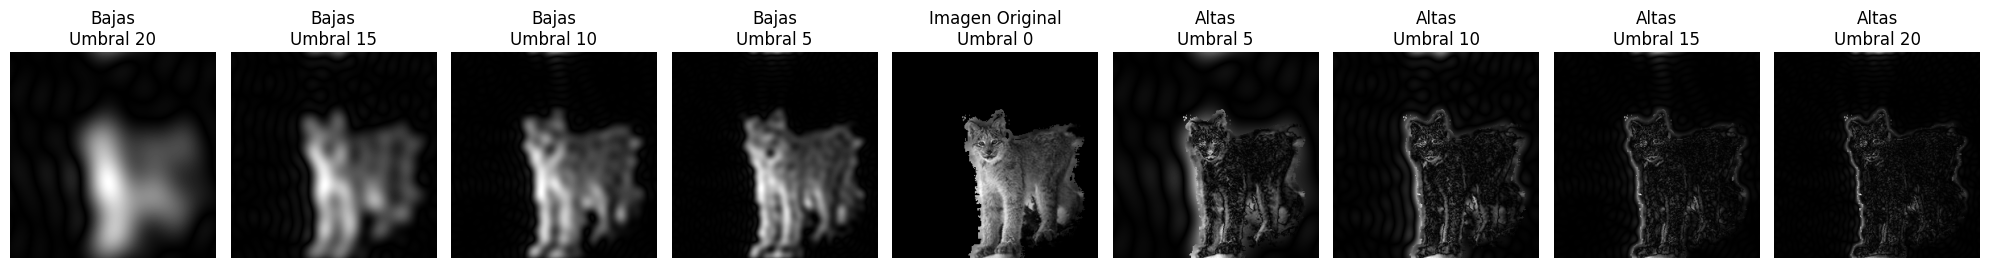

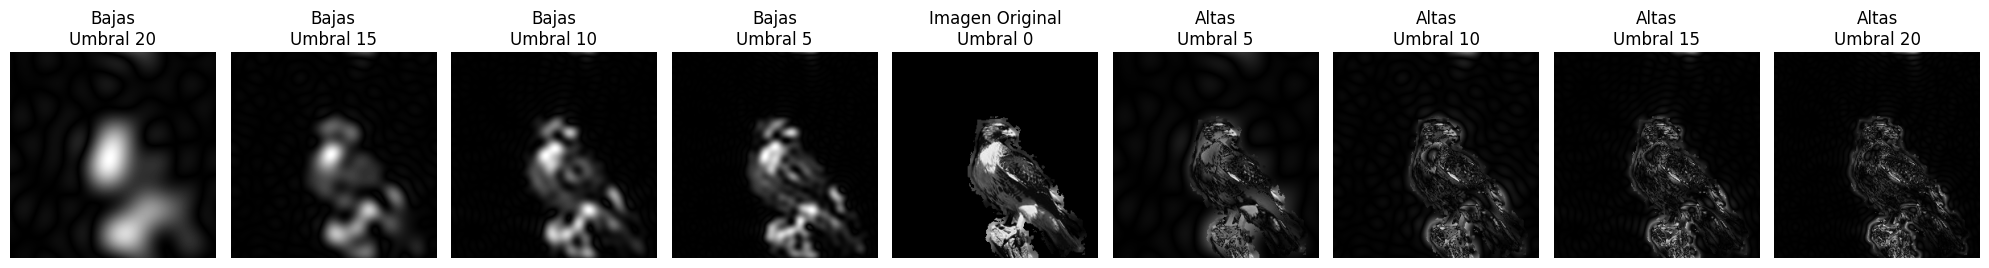

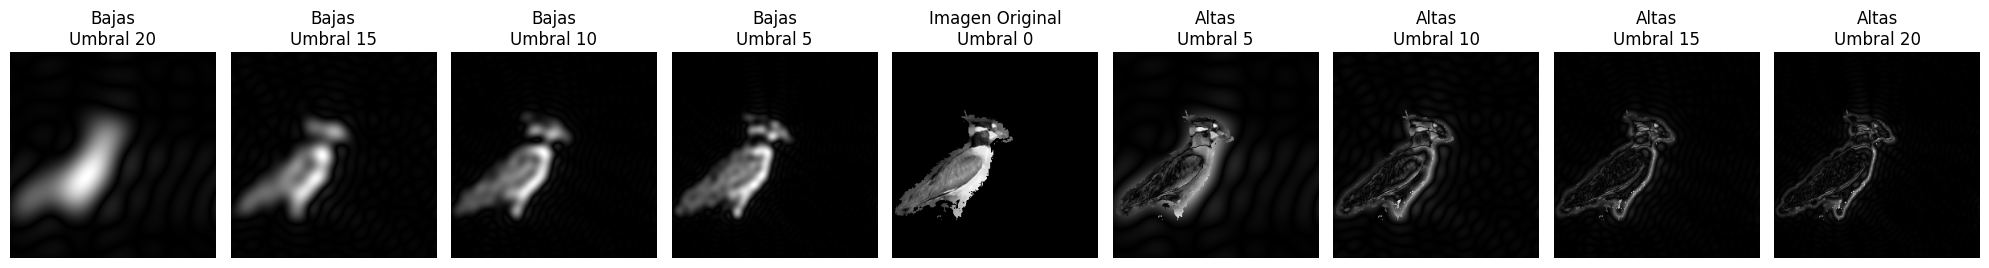

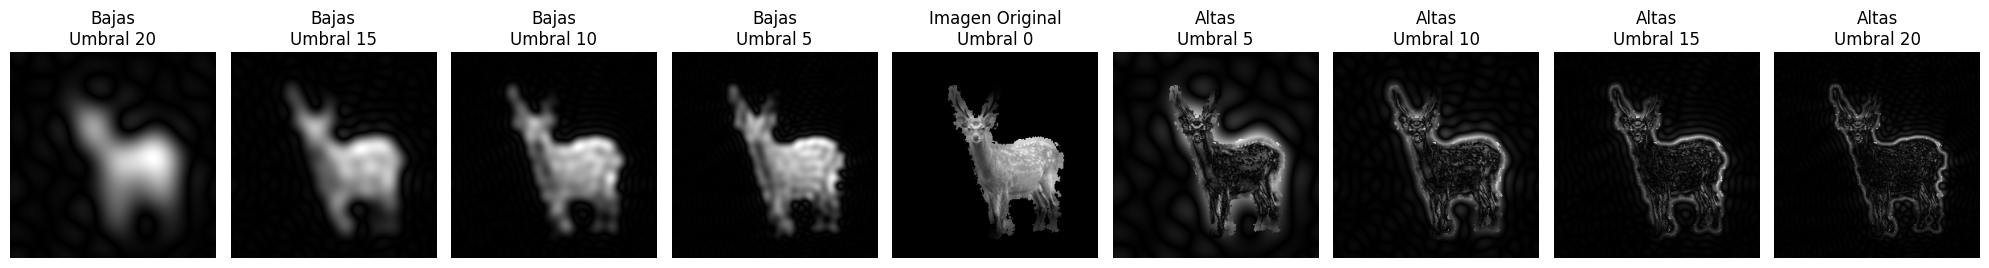

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

input_dir = r"C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\processed\animals"
output_dir = r"C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\processed\animals_frequencies"

# Crear el directorio de salida si no existe
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Obtener la lista de archivos de imagen en el directorio de entrada
image_files = [f for f in os.listdir(input_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Crear umbrales
thresholds = [5, 10, 15, 20]

for image_file in image_files:
    # Cargar la imagen
    image_path = os.path.join(input_dir, image_file)
    image = io.imread(image_path)

    # Comprobar si la imagen tiene 4 canales (RGBA)
    if image.shape[2] == 4:
        # Separar los canales RGBA
        rgb_image = image[:, :, :3]  # Los tres primeros canales (RGB)
        alpha_channel = image[:, :, 3]  # El canal alfa

        # Crear una máscara binaria a partir del canal alfa (zonas transparentes = 0)
        mask = alpha_channel > 0
    else:
        rgb_image = image
        alpha_channel = None
        mask = np.ones(rgb_image.shape[:2], dtype=bool)  # No hay transparencia, máscara completa

    # Convertir la imagen RGB a escala de grises
    gray_image = color.rgb2gray(rgb_image)

    # Aplicar la máscara sobre la imagen en escala de grises
    gray_image_masked = np.where(mask, gray_image, 0)  # Zonas transparentes se convierten en 0

    # Aplicar la transformada rápida de Fourier solo en las zonas con contenido
    f_transform = np.fft.fft2(gray_image_masked)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Inicializar listas para almacenar las imágenes de baja y alta frecuencia
    low_images = []
    high_images = []

    # Crear imágenes de baja y alta frecuencia para cada umbral
    for radius in thresholds:
        # Crear un filtro de paso bajo (frecuencias bajas)
        rows, cols = gray_image.shape
        crow, ccol = rows // 2, cols // 2
        low_pass_filter = np.zeros((rows, cols))
        y, x = np.ogrid[:rows, :cols]
        mask_radius = (x - ccol)**2 + (y - crow)**2 <= radius**2
        low_pass_filter[mask_radius] = 1

        # Crear un filtro de paso alto (frecuencias altas)
        high_pass_filter = 1 - low_pass_filter

        # Aplicar los filtros
        low_frequencies = f_transform_shifted * low_pass_filter
        high_frequencies = f_transform_shifted * high_pass_filter

        # Transformar de vuelta al dominio espacial
        low_image = np.fft.ifft2(np.fft.ifftshift(low_frequencies))
        high_image = np.fft.ifft2(np.fft.ifftshift(high_frequencies))

        # Tomar la parte real de las imágenes
        low_images.append(np.real(low_image))
        high_images.append(np.real(high_image))

    # Preparar las imágenes para visualización
    total_images = len(low_images) + len(high_images) + 1
    images = low_images + [gray_image_masked] + high_images
    titles = [f'Bajas\nUmbral {t}' for t in thresholds[::-1]] + ['Imagen Original\nUmbral 0'] + [f'Altas\nUmbral {t}' for t in thresholds]

    # Mostrar las imágenes en una sola fila y guardarlas
    fig, ax = plt.subplots(1, len(images), figsize=(20, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        ax[i].imshow(np.abs(img), cmap='gray')  # Usar np.abs para manejar posibles valores negativos tras la IFFT
        ax[i].set_title(title)
        ax[i].axis('off')

    plt.tight_layout()

    # Guardar la figura
    output_path = os.path.join(output_dir, f'frecuencias_{image_file}')
    plt.savefig(output_path)
    plt.show()

    # Guardar la imagen final con transparencia si corresponde
    if alpha_channel is not None:
        output_image_with_alpha = np.dstack([rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2], alpha_channel])
        io.imsave(os.path.join(output_dir, f'{image_file}_con_alpha.png'), output_image_with_alpha)


In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_ubyte

def normalize_image(image):
    """Normaliza una imagen de punto flotante a un rango de 0 a 255 y la convierte a uint8."""
    image_normalized = np.real(image)
    image_normalized -= image_normalized.min()
    image_normalized /= image_normalized.max()
    return img_as_ubyte(image_normalized)

def process_images(input_dir, output_base_dir, thresholds):
    for root, dirs, files in os.walk(input_dir):
        image_files = [f for f in files if f.endswith(('.png', '.jpg', '.jpeg'))]

        for image_file in image_files:
            image_path = os.path.join(root, image_file)
            image = io.imread(image_path)

            # Comprobar si la imagen tiene 4 canales (RGBA)
            if image.shape[2] == 4:
                rgb_image = image[:, :, :3]
                alpha_channel = image[:, :, 3]
                mask = alpha_channel > 0
            else:
                rgb_image = image
                alpha_channel = None
                mask = np.ones(rgb_image.shape[:2], dtype=bool)

            # Inicializar listas para almacenar las imágenes de baja y alta frecuencia
            low_images = []
            high_images = []

            for radius in thresholds:
                # Crear el directorio de salida para cada umbral
                output_dir = os.path.join(output_base_dir, f"{os.path.basename(root)}_sf_{radius}")
                low_output_dir = os.path.join(output_dir, 'low')
                high_output_dir = os.path.join(output_dir, 'high')
                alpha_low_output_dir = os.path.join(output_dir, 'alpha_low')
                alpha_high_output_dir = os.path.join(output_dir, 'alpha_high')

                os.makedirs(low_output_dir, exist_ok=True)
                os.makedirs(high_output_dir, exist_ok=True)
                os.makedirs(alpha_low_output_dir, exist_ok=True)
                os.makedirs(alpha_high_output_dir, exist_ok=True)

                # Aplicar la transformada de Fourier a cada canal
                low_image_rgb = np.zeros_like(rgb_image)
                high_image_rgb = np.zeros_like(rgb_image)

                for channel in range(3):  # Para R, G, B
                    gray_image = rgb_image[:, :, channel]
                    gray_image_masked = np.where(mask, gray_image, 0)

                    f_transform = np.fft.fft2(gray_image_masked)
                    f_transform_shifted = np.fft.fftshift(f_transform)

                    # Crear un filtro de paso bajo y un filtro de paso alto
                    rows, cols = gray_image.shape
                    crow, ccol = rows // 2, cols // 2
                    low_pass_filter = np.zeros((rows, cols))
                    y, x = np.ogrid[:rows, :cols]
                    low_pass_filter[(x - ccol) ** 2 + (y - crow) ** 2 <= radius ** 2] = 1

                    high_pass_filter = 1 - low_pass_filter

                    # Aplicar los filtros
                    low_frequencies = f_transform_shifted * low_pass_filter
                    high_frequencies = f_transform_shifted * high_pass_filter

                    # Transformar de vuelta al dominio espacial
                    low_image = np.fft.ifft2(np.fft.ifftshift(low_frequencies))
                    high_image = np.fft.ifft2(np.fft.ifftshift(high_frequencies))

                    # Normalizar las imágenes
                    low_image_rgb[:, :, channel] = normalize_image(low_image)
                    high_image_rgb[:, :, channel] = normalize_image(high_image)

                # Guardar las imágenes de baja y alta frecuencia
                low_output_path = os.path.join(low_output_dir, f"low_{image_file}")
                high_output_path = os.path.join(high_output_dir, f"high_{image_file}")

                io.imsave(low_output_path, low_image_rgb)
                io.imsave(high_output_path, high_image_rgb)

                # Opción de guardar la imagen con transparencia restaurada
                if alpha_channel is not None:
                    alpha_low_image = np.dstack([low_image_rgb[:, :, 0], low_image_rgb[:, :, 1], low_image_rgb[:, :, 2], alpha_channel])
                    alpha_high_image = np.dstack([high_image_rgb[:, :, 0], high_image_rgb[:, :, 1], high_image_rgb[:, :, 2], alpha_channel])
                    
                    alpha_low_output_path = os.path.join(alpha_low_output_dir, f'low_{image_file}_con_alpha.png')
                    alpha_high_output_path = os.path.join(alpha_high_output_dir, f'high_{image_file}_con_alpha.png')

                    io.imsave(alpha_low_output_path, alpha_low_image)
                    io.imsave(alpha_high_output_path, alpha_high_image)

                print(f"Procesada {image_file} en {output_dir} con umbral {radius}")


# Ejemplo de uso
input_dir = r"C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\processed\animals"
output_base_dir = r"C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\processed\animals_frequencies"

thresholds = [5, 10, 15, 20]  # Lista de umbrales de frecuencias espaciales

# Procesar las imágenes
process_images(input_dir, output_base_dir, thresholds)


Procesada B_N209044.png en C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\processed\animals_frequencies\animals_sf_5 con umbral 5
Procesada B_N209044.png en C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\processed\animals_frequencies\animals_sf_10 con umbral 10
Procesada B_N209044.png en C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\processed\animals_frequencies\animals_sf_15 con umbral 15
Procesada B_N209044.png en C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\processed\animals_frequencies\animals_sf_20 con umbral 20
Procesada B_N253041.png en C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\processed\animals_frequencies\animals_sf_5 con umbral 5
Procesada B_N253041.png en C:\Users\akoun\Desktop\Biocruces\2.DATASETS\SiBurmuin_50_images_dataset\processed\animals_frequencies\animals_sf_10 con umbral 10
Procesada B_N253041.png en C:\Users\akoun\Desktop\Biocruces\2.

In [28]:
low_output_path

NameError: name 'low_output_path' is not defined